In [7]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
import json

In [37]:
#R = open('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Practica_computacional\mag_papers_166.txt', 'r') 
version=161162
paper_conjuntos = []

#Saca el campo del diccionario
def sacarcampo(paper,key):
    if key in paper:
        del paper[key]

#Filtra papers, saca campos innecesarios y guarda en archivo "papers_filtro_n.txt"
def agregarpaper(R_n,paper_conjuntos):
    paper_conjuntos = []
    
    with open('/media/fede/My Passport/tp redes/papers_filtro_'+str(version)+'.txt', 'a',encoding='utf8') as archivo_guardar:
         
    #archivo_guardar = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_'+str(version)+'.txt','a',encoding='utf-8') 
    
        R = open('/media/fede/My Passport/tp redes/mag_papers_'+R_n+'.txt', 'r') 
        N = 999999
        i = 0
        for line in R:
            paper=ast.literal_eval(line)
            try:
                paper['doc_type']
                paper['fos']
                paper['keywords']
                paper['references']
                paper['venue']
                if paper['doc_type']=='Journal' and paper['lang']=='en':
                    paper_conjuntos.append(paper)
                    key='abstract';sacarcampo(paper,key)
                    key='url';sacarcampo(paper,key)
                    key='lang';sacarcampo(paper,key)
                    key='page_start';sacarcampo(paper,key)
                    key='page_end';sacarcampo(paper,key)
                    key='doc_type';sacarcampo(paper,key)
                    key='pdf';sacarcampo(paper,key)
                    json.dump(paper, archivo_guardar, ensure_ascii=False)
                    archivo_guardar.write('\n')
            except KeyError:
                pass
            i+=1
            if i==N:
                break
        R.close()
    archivo_guardar.close()
    return(paper_conjuntos)

#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in)

#Crea el archivo de papers filtrados, la lista y el diccionario de frecuencias de citas
def agregar_contar(ides_in,ides_out,R_n,paper_conjuntos):
    paper_conjuntos=agregarpaper(R_n,paper_conjuntos)
    ides_in=contador(ides_in,ides_out,paper_conjuntos)
    return(ides_in,ides_out)
    
ides_out=[]
ides_in={}
for i in range(161,163):
    ides_in,ides_out=agregar_contar(ides_in,ides_out,str(i),[])
    print(i)
    
#ides_in,ides_out=agregar_contar(ides_in,ides_out,str(162),[])

161
162


In [38]:
interseccion=(set(ides_out).intersection(list(ides_in.keys())))
print(len(interseccion))

27459


In [40]:
len(ides_in)

4402681

In [ ]:
interseccion_archivo = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_'+str(version)+'.txt','a',encoding='utf-8') 
for i in interseccion:
    interseccion_archivo.write(i+'\n')
interseccion_archivo.close()

In [10]:
f = json.load('/home/fede/Desktop/papers_filtro_1.txt')

AttributeError: 'str' object has no attribute 'read'

In [16]:
 R = open('/home/fede/Desktop/papers_filtro_1.txt','r') 

In [17]:
R

<_io.TextIOWrapper name='/home/fede/Desktop/papers_filtro_1.txt' mode='r' encoding='UTF-8'>

In [13]:
#version=str(version)
def filtrar_paper(G,interseccion):
    i=0
    paper_conjuntos = []
    #R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_'+version+'.txt','r') 
    R = open('/home/fede/Desktop/papers_filtro_1.txt','r',encoding = 'UTF-8') 
#     archivo_red = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_red'+version+'.txt','a',encoding='utf-8')
#     archivo_year = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_year'+version+'.txt','a',encoding='utf-8')
#     archivo_venue = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_venue'+version+'.txt','a',encoding='utf-8')
#     archivo_fos = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_fos'+version+'.txt','a',encoding='utf-8')
#     archivo_keywords = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_keywords'+version+'.txt','a',encoding='utf-8')
#     archivo_name = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_name'+version+'.txt','a',encoding='utf-8')
#     archivo_org = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_org'+version+'.txt','a',encoding='utf-8')
    for line in R:
        try:
            paper=ast.literal_eval(line)
        except:
            i+=1
#         if paper['id'] in interseccion:
#             pass
            #archivo_year.write(str(paper['id'])+' '+str(paper['year'])+'\n')
            #archivo_fos.write(str(paper['id'])+' '+str(paper['fos'])+'\n')
            #archivo_venue.write(str(paper['id'])+' '+str(paper['venue'])+'\n')
#             try:
#                 archivo_keywords.write(paper['id']+' '+str(paper['keywords'])+'\n')
#             except KeyError:
#                 pass
#             try:
#                 archivo_name.write(paper['id']+' '+paper['authors'][0]['name']+'\n')
#             except KeyError:
#                 pass
#             try:
#                 archivo_org.write(paper['id']+' '+paper['authors'][0]['org']+'\n')
#             except KeyError:
#                 pass
            
#             for cita in paper['references']:
#                 if cita in interseccion:
#                     pass
                    #G.add_edge(paper['id'],cita)  
                    #archivo_red.write(str(paper['id'])+' '+cita+'\n')
    R.close()
#     archivo_red.close()
#     archivo_year.close()
#     archivo_venue.close()
#     archivo_fos.close()
#     archivo_keywords.close()
#     archivo_name.close()
#     archivo_org.close()
    print(i)
    return(G)

G=nx.DiGraph()
G=filtrar_paper(G,interseccion=2)

7588


In [14]:
R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_12.txt','r',encoding='utf-8')
i=0
for paper in R:
    i+=1
    if line==paper:
        break
R.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_12.txt'

In [19]:
i
len(G)

72539

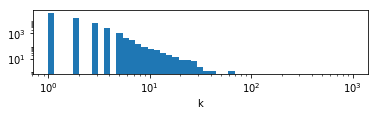

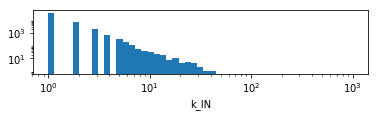

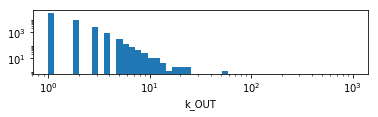

In [9]:
# Distribución de grado
plt.subplot(311)
grados_G = [gra for gra in G.degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.subplot(312)
# Distribución de grado IN
grados_G = [gra for gra in G.in_degree().values()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.subplot(313)
# Distribución de grado OUT
grados_G = [gra for gra in G.out_degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

In [45]:
GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))
largo=[]
for i in Componentes:
    largo.append(len(i))

plt.semilogy(largo)

23240
124148


In [ ]:
M=1

options = {
'node_size': 1,
'width': 0.01,
}

for i in Componentes[:M]:
    nx.draw(i, **options)
    plt.show()

C:\Users\Usuario\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()


In [59]:
len(Componentes[0])

10163

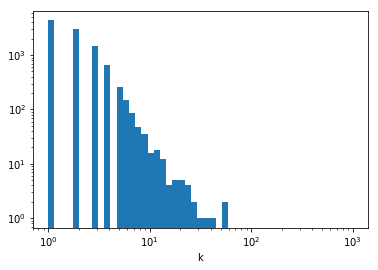

In [60]:
# Distribución de grado
grados_G = [gra for gra in Componentes[0].degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()